In [8]:
from init import *
from rootIO import *

In [9]:
_files_dir = '/Users/christianwittweg/geant4_workdir/MuensterTPC-MC/example_spectra_decay0/'
_filename = '*_Decay0_Xe124_'
_decayname = '0nukk'
_suffix = '.root'

_file = _files_dir + _filename + _decayname + _suffix

branches= ['eventid','ed', 'xp', 'yp', 'zp', 'type', 'trackid', 'time', 'parentid','etot']

df = g4root_to_df(_file,branches,1)


/Users/christianwittweg/geant4_workdir/MuensterTPC-MC/example_spectra_decay0/*_Decay0_Xe124_0nukk.root



In [10]:
df.head()

,eventid,ed,xp,yp,zp,type,trackid,time,parentid,etot
entry,,,,,,,,,,
0,0,"[0.67752, 5.4169, 109.557625, 87.41022, 90.475...","[417.15875, 416.81995, 416.7374, 416.72256, 41...","[136.4452, 136.66272, 136.67523, 136.63693, 13...","[-205.96211, -206.67836, -206.69632, -206.6653...","[b'gamma', b'gamma', b'e-', b'e-', b'e-', b'e-...","[5, 5, 7, 7, 7, 7, 7, 6, 6, 6, 8, 4, 4, 3, 3, ...","[4.9972976e-10, 5.024705e-10, 5.028129e-10, 5....","[0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 7, 0, 0, 0, 0, ...",2854.498779
1,1,"[0.98947, 0.67752, 0.0, 0.14798, 0.9266, 75.74...","[-82.07674, -84.73854, -163.157, -185.69304, -...","[253.04224, 253.4043, 264.07867, 267.17813, 26...","[-224.56065, -221.79335, -224.0612, -222.92786...","[b'gamma', b'gamma', b'gamma', b'gamma', b'gam...","[4, 4, 4, 4, 4, 8, 8, 8, 7, 7, 7, 7, 6, 6, 5, ...","[2.981527e-11, 4.267991e-11, 3.067763e-10, 3.8...","[0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...",2855.053223
2,2,"[0.69091, 0.69091, 0.06984, 0.06984, 34.556, 7...","[88.19442, 62.191334, 60.938297, 71.356346, 71...","[-412.8342, -471.51715, -472.01706, -476.9069,...","[-185.97144, -253.90717, -250.9758, -256.12143...","[b'gamma', b'gamma', b'gamma', b'gamma', b'gam...","[5, 5, 5, 5, 5, 10, 10, 9, 9, 8, 8, 7, 7, 7, 7...","[1.4653101e-10, 4.582861e-10, 4.6904985e-10, 5...","[0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",2286.615723
3,3,"[0.0, 0.69091, 5.1039, 34.556, 107.79075, 51.5...","[-414.73053, -372.069, -362.72495, -363.59103,...","[297.70532, 329.2546, 346.38654, 344.8032, 344...","[-5.5095906, -9.797412, 17.614481, 16.49724, 1...","[b'gamma', b'gamma', b'gamma', b'gamma', b'e-'...","[5, 5, 5, 5, 8, 8, 8, 7, 7, 7, 6, 6, 6, 4, 4, ...","[2.8279112e-10, 4.6035714e-10, 5.7259675e-10, ...","[0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, ...",2854.496826
4,4,"[0.92656, 4.7747, 119.11888, 94.72446, 0.0, 11...","[-380.97913, -380.68463, -380.66583, -380.6641...","[154.99393, 165.31134, 165.33392, 165.34177, 1...","[51.089, 38.62219, 38.610046, 38.61336, 38.613...","[b'gamma', b'gamma', b'e-', b'e-', b'e-', b'e-...","[4, 4, 6, 6, 6, 5, 5, 5, 5, 5, 7, 3, 2, 1, 10,...","[2.7992797e-11, 8.198045e-11, 8.212996e-11, 8....","[0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 1, ...",667.056702


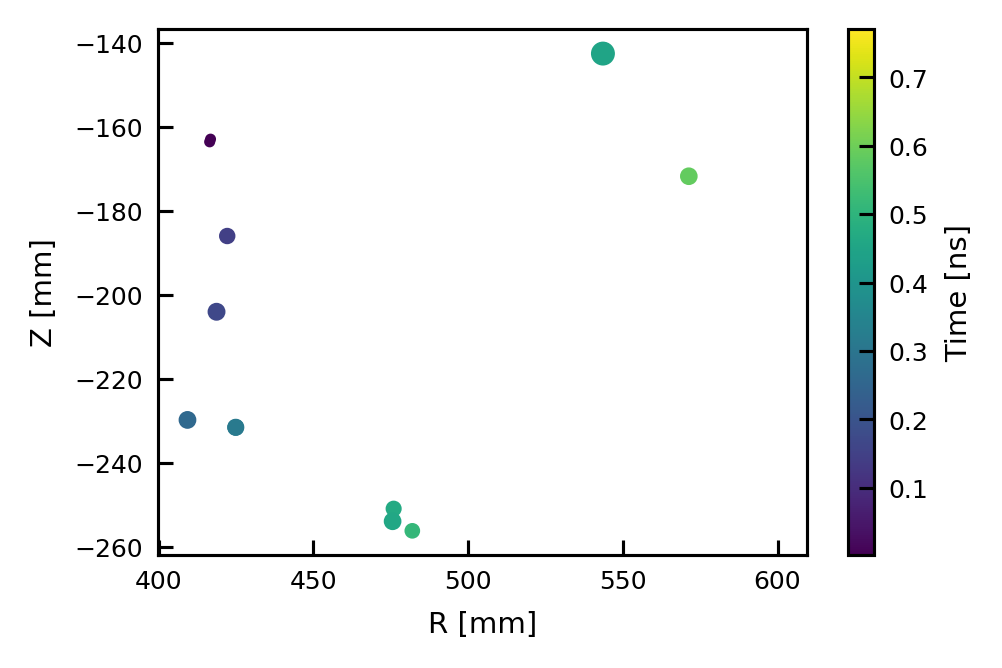

In [19]:
eventid=2

plt.scatter((np.sqrt(df.xp[eventid]**2+df.yp[eventid]**2)), df.zp[eventid], c=df.time[eventid]*1e9, s=df.ed[eventid]/10)
plt.colorbar(label='Time [ns]')
plt.xlabel('R [mm]')
plt.ylabel('Z [mm]')
plt.draw()
plt.show()

In [12]:
esum_late=0
for pair in zip(np.array(df.iloc[eventid]['time']),np.array(df.iloc[eventid]['ed'])):
    if pair[0] > 0.02e-9:
        esum_late+=pair[1]
        
print(esum_late)

esum_early=0
for pair in zip(np.array(df.iloc[eventid]['time']),np.array(df.iloc[eventid]['ed'])):
    if pair[0] < 0.02e-9:
        esum_early+=pair[1]
        
print(esum_early)

print(esum_early+esum_late)

2187.4439947642386
64.32998323440552
2251.773977998644


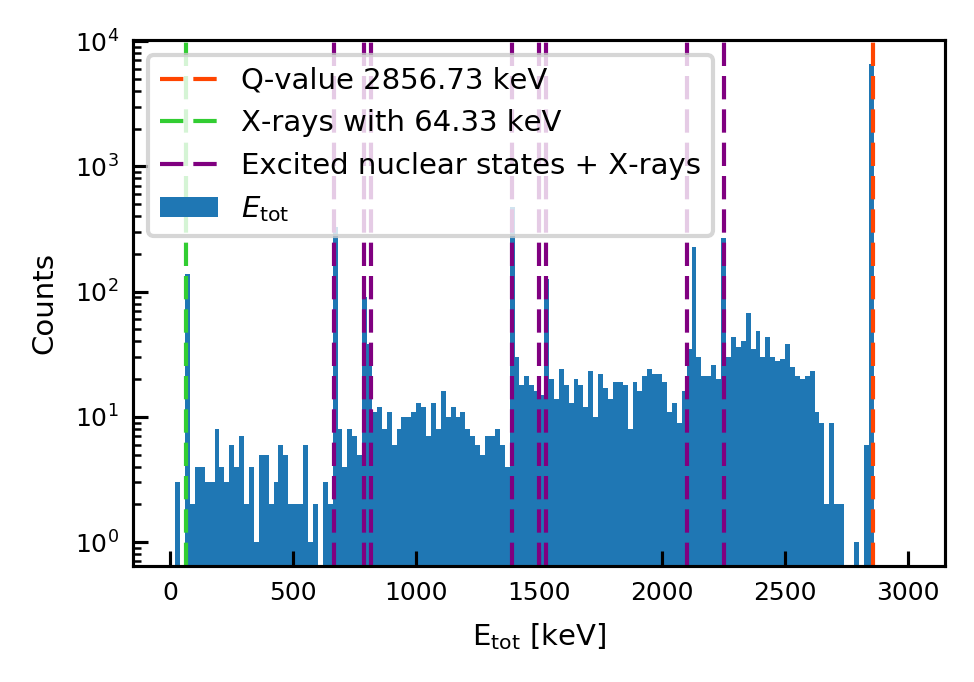

In [16]:
plt.hist(df.etot,range=(0,3000),bins=150, label='$E_{\\rm{tot}}$')
plt.xlabel('E$_{\\rm{tot}}$ [keV]')
plt.ylabel('Counts')
plt.axvline(2856.73, linestyle='--', color='orangered', linewidth=1, label='Q-value 2856.73 keV')
plt.axvline(64.33, linestyle='--', color='limegreen', linewidth=1, label='X-rays with 64.33 keV')
plt.axvline(2188+64.33, linestyle='--', color='purple', linewidth=1, label='Excited nuclear states + X-rays')
plt.axvline(603+64.33, linestyle='--', color='purple', linewidth=1)
plt.axvline(1465+64.33, linestyle='--', color='purple', linewidth=1)
plt.axvline(723+64.33, linestyle='--', color='purple', linewidth=1)
plt.axvline(1326+64.33, linestyle='--', color='purple', linewidth=1)
plt.axvline(752+64.33, linestyle='--', color='purple', linewidth=1)
plt.axvline(1437+64.33, linestyle='--', color='purple', linewidth=1)
plt.axvline(2039+64.33, linestyle='--', color='purple', linewidth=1)

plt.yscale('log')

plt.legend(frameon=True, loc='upper left')
plt.draw()
plt.savefig(_decayname+'_etot.pdf', transparent=True, bbox_inches='tight')
plt.show()

In [17]:
for pair in zip(df.trackid[eventid], df.type[eventid], df.parentid[eventid]):
    print(pair)

(5, b'gamma', 0)
(4, b'gamma', 0)
(4, b'gamma', 0)
(4, b'gamma', 0)
(4, b'gamma', 0)
(4, b'gamma', 0)
(10, b'e-', 4)
(10, b'e-', 4)
(10, b'e-', 4)
(9, b'e-', 4)
(9, b'e-', 4)
(9, b'e-', 4)
(8, b'e-', 4)
(8, b'e-', 4)
(7, b'e-', 4)
(7, b'e-', 4)
(7, b'e-', 4)
(6, b'e-', 4)
(6, b'e-', 4)
(6, b'e-', 4)
(11, b'gamma', 4)
(3, b'gamma', 0)
(3, b'gamma', 0)
(3, b'gamma', 0)
(2, b'gamma', 0)
(1, b'gamma', 0)
(17, b'e-', 1)
(17, b'e-', 1)
(16, b'e-', 2)
(16, b'e-', 2)
(14, b'e-', 3)
(14, b'e-', 3)
(14, b'e-', 3)
(14, b'e-', 3)
(13, b'e-', 3)
(13, b'e-', 3)
(13, b'e-', 3)
(13, b'e-', 3)
(13, b'e-', 3)
(13, b'e-', 3)
(13, b'e-', 3)
(13, b'e-', 3)
(13, b'e-', 3)
(12, b'e-', 11)
(12, b'e-', 11)
(18, b'gamma', 13)
(20, b'gamma', 18)
(15, b'gamma', 3)
(22, b'e-', 15)
(22, b'e-', 15)
(21, b'e-', 20)
(21, b'e-', 20)
(19, b'e-', 18)
(19, b'e-', 18)
(19, b'e-', 18)
(19, b'e-', 18)
